In [9]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
import io
import requests
import numpy as np

In [10]:
url = "https://raw.githubusercontent.com/silviostanzani/PosBigData/master/Auto2.csv"
s = requests.get(url).content
dataframe = read_csv(io.StringIO(s.decode('utf-8')))
print(dataframe)
print(dataframe.columns)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X_ = dataset[:,2:8]
y_ = dataset[:,1]
#print(X)
#print(y)

X = np.asarray(X_).astype(np.float32)
y = np.asarray(y_).astype(np.float32)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0          86    2790          15.6    82   
393  44.0          4          97.0          52    2130          24.6    82   
394  32.0          4         135.0          84    2295          11.6    82   
395  28.0          4         120.0          79    2625          18.6    82   
396  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [11]:
model = Sequential()

model.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))


# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [12]:
history=model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)

Epoch 1/200
7/7 - 0s - loss: 36.7394 - mse: 36.7394 - val_loss: 19.0107 - val_mse: 19.0107 - 132ms/epoch - 19ms/step
Epoch 2/200
7/7 - 0s - loss: 10.8460 - mse: 10.8460 - val_loss: 3.6231 - val_mse: 3.6231 - 9ms/epoch - 1ms/step
Epoch 3/200
7/7 - 0s - loss: 1.3574 - mse: 1.3574 - val_loss: 0.7569 - val_mse: 0.7569 - 9ms/epoch - 1ms/step
Epoch 4/200
7/7 - 0s - loss: 1.3342 - mse: 1.3342 - val_loss: 1.8529 - val_mse: 1.8529 - 9ms/epoch - 1ms/step
Epoch 5/200
7/7 - 0s - loss: 1.4880 - mse: 1.4880 - val_loss: 0.8934 - val_mse: 0.8934 - 9ms/epoch - 1ms/step
Epoch 6/200
7/7 - 0s - loss: 0.6578 - mse: 0.6578 - val_loss: 0.6928 - val_mse: 0.6928 - 9ms/epoch - 1ms/step
Epoch 7/200
7/7 - 0s - loss: 0.6479 - mse: 0.6479 - val_loss: 0.8473 - val_mse: 0.8473 - 9ms/epoch - 1ms/step
Epoch 8/200
7/7 - 0s - loss: 0.6527 - mse: 0.6527 - val_loss: 0.6955 - val_mse: 0.6955 - 10ms/epoch - 1ms/step
Epoch 9/200
7/7 - 0s - loss: 0.5493 - mse: 0.5493 - val_loss: 0.6354 - val_mse: 0.6354 - 9ms/epoch - 1ms/step


In [13]:
results = model.evaluate(test_x, test_y)
print(results)

3/3 [==============================] - 0s 822us/step - loss: 0.4590 - mse: 0.4590
[0.4590272307395935, 0.4590272307395935]


[Text(0.5, 23.52222222222222, 'Época')]

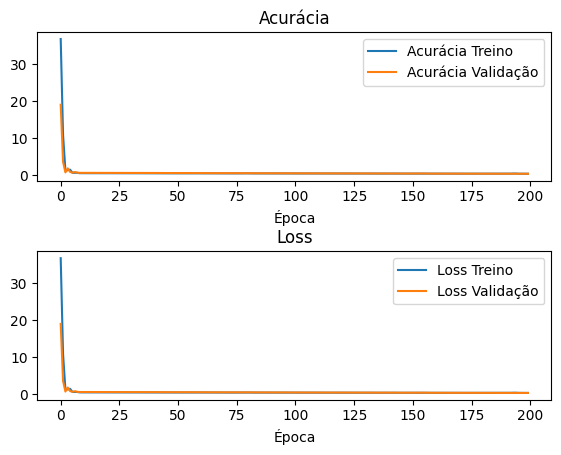

In [14]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['mse']
xv=history.history['val_mse']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [15]:
#train_y, test_y
res=model.predict(test_x)
#res2=res.astype(float)
np.set_printoptions(precision=0)
#print(np.around(res2[:10],3))
print(res[:10])
print(test_y[:10])

3/3 [==============================] - 0s 767us/step
[[7.]
 [3.]
 [6.]
 [5.]
 [6.]
 [4.]
 [4.]
 [4.]
 [5.]
 [6.]]
[8. 4. 6. 6. 6. 4. 4. 4. 6. 5.]


In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, res, squared=False)

0.67751557

# Ao incluir uma camada escondida, o valor de R ao quadrado aumentou, significando que a acurácia do modelo diminuiu.